# Chemspace Explorer Initialization

In [1]:
import sys
import os

# Get path to the parent directory containing the package
MAIN_FOLDER = os.path.abspath(
    os.path.join(os.getcwd(), "../ms_chemical_space_explorer")
)
DATA_FOLDER = "data"
PROCESSED_DATA_FOLDER = "processed"
FILENAME = os.path.join(
    MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER, "1000_test_spectra.mgf"
)
PICKLE = "pickle"

print(f"Adding to path: {MAIN_FOLDER}")
sys.path.append(MAIN_FOLDER)

Adding to path: g:\Dokumente\Studium\MMI\Master-Arbeit\Code\ms_chemical_space_explorer


In [2]:
from ms_chemical_space_explorer.chemical_space_explorer import spectra_importer

query_spectra = spectra_importer(FILENAME)

Processing spectra: 100%|██████████| 1000/1000 [00:04<00:00, 247.89it/s]


In [3]:
from ms_chemical_space_explorer.chemical_space_explorer import start_workflow

explorer = start_workflow(os.path.abspath(os.path.join(MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER)))

Initialize ChemExplorer


d:\Programmierung\anaconda3\envs\chemspace\Lib\site-packages\ms2deepscore\models\load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(

In [4]:
import pandas as pd
spectra_df = pd.DataFrame([query_spectrum.to_dict() for query_spectrum in query_spectra])
spectra_inchi14s = spectra_df.inchikey.apply(lambda inchikey: inchikey[:14])

In [5]:
print(f"Number of reference compounds: {len(explorer.reference_compounds)}")
print(f"Number of spectra: {len(query_spectra)}")
print(f"Number of spectra_inchi14s: {len(spectra_inchi14s)}")

Number of reference compounds: 37656
Number of spectra: 603
Number of spectra_inchi14s: 603


In [6]:
xor_mask = ~spectra_inchi14s.isin(explorer.reference_compounds.index)
xor_mask.sum()

7

In [7]:
spectra_df[xor_mask].describe()

,charge,precursor_mz,retention_time,parent
count,7.0,7.000000,7.000000,0.0
mean,1.0,187.962320,48.025714,NaN
std,0.0,20.353372,6.957130,NaN
min,1.0,167.081500,40.410000,NaN
25%,1.0,171.088995,43.070000,NaN
50%,1.0,188.091730,45.800000,NaN
75%,1.0,197.128450,52.515000,NaN
max,1.0,224.128120,58.800000,NaN


In [8]:
spectra_df[xor_mask]

,charge,ionmode,scans,ms_level,instrument_type,file_name,peptide_sequence,organism_name,compound_name,principal_investigator,...,theoretical_m/z_41038575_mass_diff_0_(1086_ppm)_smiles_*cc(*)c*_annotation_[c3h8-3h]+_rule_of_hr_true,theoretical_m/z_43017843_mass_diff_0_(959_ppm)_smiles_*cc(*)o_annotation_[c2h6o-3h]+_rule_of_hr_true,theoretical_m/z_56049474_mass_diff_0001_(1616_ppm)_smiles_*cc(*)cn_annotation_[c3h9n-3h]+_rule_of_hr_true,theoretical_m/z_57033491_mass_diff_0001_(2138_ppm)_smiles_*cc(o)c*_annotation_[c3h8o-3h]+_rule_of_hr_true,theoretical_m/z_60044391_mass_diff_0_(148_ppm)_smiles_*c(o)cn_annotation_[c2h7no-h]+_rule_of_hr_true,theoretical_m/z_84044389_mass_diff_0_(32_ppm)_smiles_*c(,theoretical_m/z_85028406_mass_diff_0_(217_ppm)_smiles_*c(,theoretical_m/z_102054958_mass_diff_0003_(2981_ppm)_smiles_*c(,theoretical_m/z_103038974_mass_diff_0002_(1772_ppm)_smiles_*cc(o)cc(,r
304,1,positive,-1,2,Orbitrap,NaN,NaN,NaN,"4,5,6,7-tetrahydro-1H-indazole-4-carboxylic acid",Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,1,positive,-1,2,Orbitrap,NaN,NaN,NaN,8-(propan-2-yl)-8-azabicyclo[3.2.1]octane-3-ca...,Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,1,positive,512,2,Orbitrap,NaN,NaN,NaN,5-(1-methylpyrrolidin-2-yl)-1H-pyrazole-3-carb...,Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,1,positive,326,2,Orbitrap,NaN,NaN,NaN,1-acetyl-3-hydroxypiperidine-3-carboxylic acid,Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,1,positive,297,2,Orbitrap,NaN,NaN,NaN,3-cyclopropylfuran-2-carboxylic acid,Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,1,positive,-1,2,Orbitrap,NaN,NaN,NaN,AKOS015373898,Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,1,positive,374,2,Orbitrap,NaN,NaN,NaN,1-acetylpiperidine-2-carboxylic acid,Tomas Pluskal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import pickle
from ms_chemical_space_explorer.chemical_space_explorer import start_workflow


def analogue_search(n: int = 2):
    file = os.path.join(PICKLE, f"results_n={n}.pkl")
    try:
        with open(file, "rb") as f:
            analogues = pickle.load(f)
            print(f"Loaded analogues from {file}")

    except FileNotFoundError:
        explorer = start_workflow(
            os.path.abspath(
                os.path.join(MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER)
            )
        )
        analogues = explorer.analogue_search(query_spectra, n=n)

        with open(file, "wb") as f:
            pickle.dump(analogues, f)
        print(f"Analogues saved to {file}")

    return analogues

#### somethimes this works, sometimes the approach above

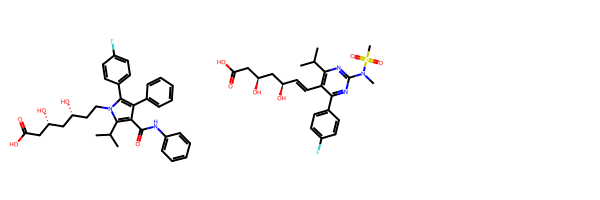

In [10]:
# some unrelated more complex mols
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

atorvastatin = Chem.MolFromSmiles(
    "O=C(O)C[C@H](O)C[C@H](O)CCn2c(c(c(c2c1ccc(F)cc1)c3ccccc3)C(=O)Nc4ccccc4)C(C)C"
)
rosuvastatin = Chem.MolFromSmiles(
    "OC(=O)C[C@H](O)C[C@H](O)\C=C\c1c(C(C)C)nc(N(C)S(=O)(=O)C)nc1c2ccc(F)cc2"
)
MolsToGridImage((atorvastatin, rosuvastatin))

# Code

## Load Analogues and import methods

### Load Query Spectra

Examples for a bad matches: QUERY_SPECTRUM_ID = 8

Examples for good matches: 3

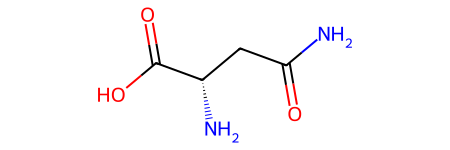

In [140]:
QUERY_SPECTRUM_ID = 8
query_mol = Chem.MolFromSmiles(query_spectra[QUERY_SPECTRUM_ID].metadata["smiles"])
query_mol

### Load Analogues

In [141]:
import pandas as pd

all_analogues = analogue_search(n=3)
all_analogues

Loaded analogues from pickle\results_n=3.pkl


,smiles,predicted_distance,mean_distance,std_distance,isf,candidate_mean_similarity,candidate_std_similarity,precursor_mz_diff,visual_x,visual_y,inchikey,query_spectrum_id,ionmode
1482,CCCCC\C=C/C\C=C/CCCCCCCC(=O)OCC(COP(O)(=O)OC1C...,0.037059,0.039914,0.005182,0.966980,0.951327,0.039300,-4.033600,10.855725,2.893498,IDBHHLONPONREV,176,negative
1483,CCCCCCCCCCCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)C(O)...,0.039129,0.039914,0.005182,0.966980,0.951327,0.039300,-14.021600,6.573919,3.105054,NHCUHDJVBAQLLF,176,negative
1484,CCCCCCCCCCCCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)C(O...,0.040339,0.039914,0.005182,0.966980,0.951327,0.039300,2.010600,14.638113,-5.208595,GGSSNEAFVQRIHU,176,negative
1691,CCCCC/C=C\C/C=C\C/C=C\CCCCCCC(=O)O[C@H](COC(=O...,0.042183,0.036931,0.004866,0.964284,0.947459,0.039397,19.968000,8.401516,1.257386,DYTUHXQCMCKAHL,245,negative
1690,CCCCC\C=C/C\C=C/CCCCCCCC(=O)OCC(COP(O)(=O)OC1C...,0.039124,0.036931,0.004866,0.964284,0.947459,0.039397,-6.041800,12.741820,0.653669,PJGBJPJEYMOHKG,245,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Cn1cncc1C[C@@H](C(=O)O)N,0.215882,0.190069,0.046234,0.112656,0.035263,0.170949,0.010830,8.573842,1.309396,JDHILDINMRGULE,355,positive
62,N1C=NC2=C1C=NC=N2,0.114903,0.127105,0.011707,0.110706,0.065361,0.230543,-46.030500,11.015861,4.740924,KDCGOANMDULRCW,304,positive
840,NC(N)=O,0.104779,0.161976,0.032626,0.106825,0.010000,0.099499,-59.025321,14.382889,4.222836,XSQUKJJJFZCRTK,564,positive
892,CN1C=NC=C1,0.322333,0.310428,0.011798,0.099405,0.020233,0.139976,-47.025875,16.075138,0.348935,MCTWTZJPVLRJOU,582,positive


In [142]:
from ms_chemical_space_explorer.fragment_extractor import (
    generate_mols_from_spectrum_query,
)

# Pick analogues for a specific spectrum
query_analogues_df = all_analogues[all_analogues["query_spectrum_id"] == QUERY_SPECTRUM_ID]

query_analogues_df

,smiles,predicted_distance,mean_distance,std_distance,isf,candidate_mean_similarity,candidate_std_similarity,precursor_mz_diff,visual_x,visual_y,inchikey,query_spectrum_id,ionmode
978,CC(=O)N1CCC[C@H]1C(=O)O,0.245536,0.24507,0.046966,0.536810,0.405242,0.28807,25.02165,12.311276,-6.968672,GNMSLDIYJOSUSW,8,negative
979,NCC(=O)N(C1)C(CC1)C(O)=O,0.227922,0.24507,0.046966,0.526758,0.405242,0.28807,40.03205,9.534314,2.333541,KZNQNBZMBZJQJO,8,negative
980,CCC(=O)N1CCCC1C(=O)O,0.280073,0.24507,0.046966,0.524664,0.405242,0.28807,39.03706,3.438277,-0.876869,DAOGFHQPAHSMQS,8,negative


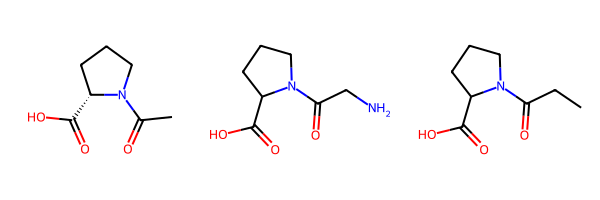

In [143]:
# generate rdkit mols and preapre them for visualization
query_analogues = generate_mols_from_spectrum_query(
    spectrum_query_result=query_analogues_df
)

MolsToGridImage(query_analogues)

## Similarity Maps

In [144]:
# Morgan fingerprint parameters
MORGAN_RADIUS = 9
NBITS = 2048
USE_FEATURES = False
FPTYPE = "bv"  # "bv" or "count"
# SimMap Fragment parameters
SIM_MAP_THESHOLD = 0.2
NORMALIZE_WEIGHTS = True
# visualization in this notebook
FRAGMENTS_PER_ROW = 5

In [145]:
from rdkit.Chem.Draw import SimilarityMaps


def MorganWrapper(mol, atomId, **kwargs):
    return SimilarityMaps.GetMorganFingerprint(
        mol,
        atomId,
        radius=MORGAN_RADIUS,
        fpType=FPTYPE,
        nBits=NBITS,
        useFeatures=USE_FEATURES,
        **kwargs
    )

#### Query sim maps:

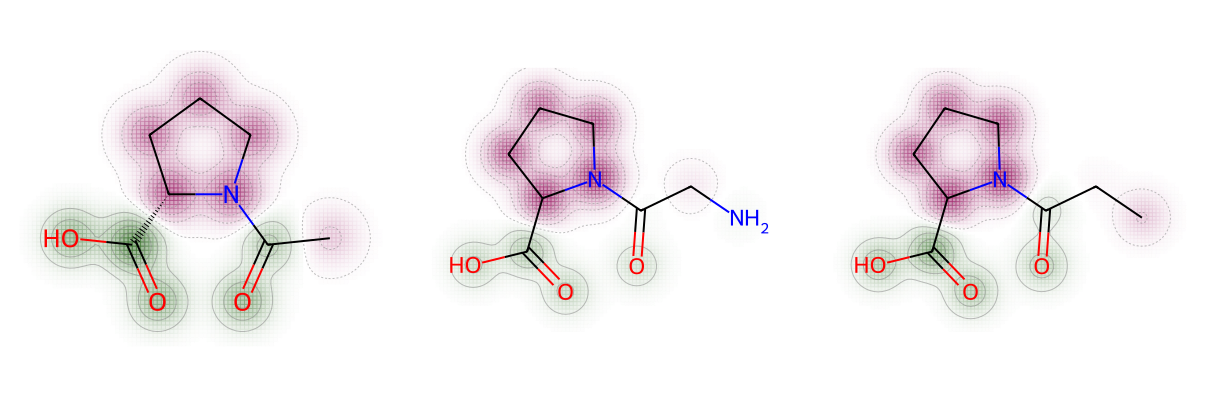

In [146]:
from rdkit.Chem import Draw
from ms_chemical_space_explorer.chemical_space_visualizer import (
    draw_sim_map,
    draw_images,
    create_sim_maps,
    draw_mol,
)

draw2d = Draw.MolDraw2DCairo(400, 400)

query_sim_maps = []
query_weights = []
for analogue in query_analogues:
    query_sim_maps.append(
        draw_sim_map(draw2d, query_mol, analogue, MorganWrapper, size=(10, 10))
    )
    weights = SimilarityMaps.GetAtomicWeightsForFingerprint(
        query_mol, analogue, MorganWrapper
    )
    if NORMALIZE_WEIGHTS:
        weights, _ = SimilarityMaps.GetStandardizedWeights(weights)
    query_weights.append(weights)

draw_images(query_sim_maps)

In [147]:
def extract_stacked_weights_from_analogues(
    mols: list[Chem.Mol],
    fp_function: callable = SimilarityMaps.GetMorganFingerprint,
    normalize_stacked_weights: bool = True,
) -> list[float]:
    """
    Extracts similar substructures from a list of molecules.

    Args:
        mols (list[Chem.Mol]): List of molecules to extract
        fingerprint_type (function, optional): Fingerprint function to use when comparing molecules. Defaults to SimilarityMaps.GetRDKFingerprint.

    Returns:
        list[float]:
    """

    stacked_weights = []

    for ref_mol in mols:
        ref_mol_id = ref_mol.GetProp("analogue_id")
        ref_mol_stacked_weights = [0] * ref_mol.GetNumAtoms()
        for probe_mol in mols:
            probe_mol_id = probe_mol.GetProp("analogue_id")
            # Skip if comparing molecule to itself
            if probe_mol_id == ref_mol_id:
                continue

            sim_weights = SimilarityMaps.GetAtomicWeightsForFingerprint(
                probe_mol, ref_mol, fp_function
            )
            sim_weights, _ = SimilarityMaps.GetStandardizedWeights(sim_weights)

            assert (
                len(sim_weights) == ref_mol.GetNumAtoms()
            ), "Length of sim_weights does not match number of atoms in reference molecule."
            ref_mol_stacked_weights = [
                ref_mol_stacked_weights[i] + sim_weights[i]
                for i in range(ref_mol.GetNumAtoms())
            ]

        if normalize_stacked_weights:
            ref_mol_stacked_weights, _ = SimilarityMaps.GetStandardizedWeights(
                ref_mol_stacked_weights
            )
        stacked_weights.append(ref_mol_stacked_weights)

    return stacked_weights

In [148]:
from ms_chemical_space_explorer.chemical_space_visualizer import (
    str_to_image,
    SimMapLegend,
)


from PIL import Image



def draw_sim_map_by_weights(
    draw2d: Draw.MolDraw2D,
    mol: Chem.Mol,
    weigths: list[float],
    size: tuple[int, int] = (50, 50),
    legend: SimMapLegend = None,
) -> Image.Image:


    draw2d = SimilarityMaps.GetSimilarityMapFromWeights(
        mol, weigths, draw2d=draw2d, size=size
    )


    draw2d.FinishDrawing()


    img = str_to_image(draw2d.GetDrawingText())


    if legend:


        return legend.draw(img)


    return img

#### Stacked analogue sim maps:

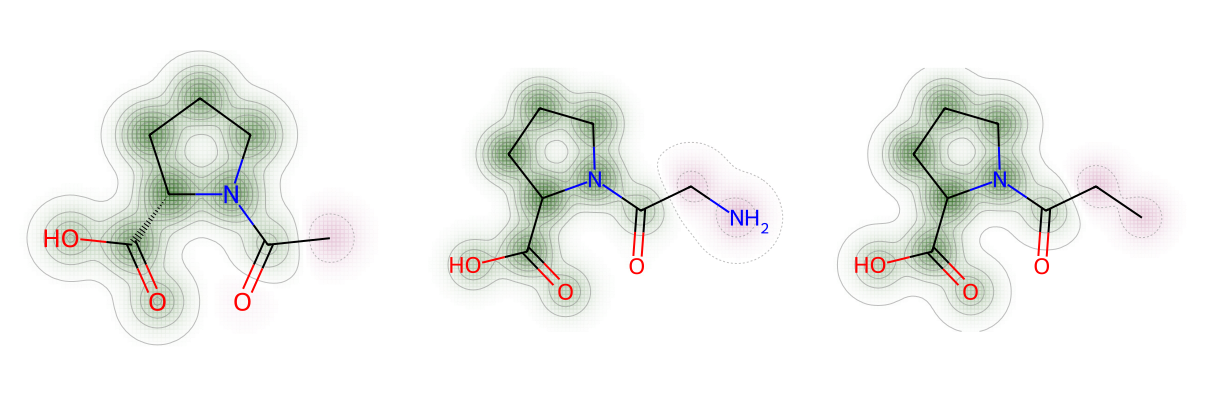

In [149]:
stacked_weights = extract_stacked_weights_from_analogues(
    query_analogues,
    fp_function=MorganWrapper,
    normalize_stacked_weights=NORMALIZE_WEIGHTS,
)

imgs = []
for i, analogue in enumerate(query_analogues):
    draw2d = Draw.MolDraw2DCairo(400, 400)
    imgs.append(
        draw_sim_map_by_weights(draw2d, analogue, stacked_weights[i], size=(10, 10))
    )

draw_images(imgs)

In [150]:
print(f"Average weight differences of analogue sim maps to query sim map")
avg_weight_diffs = []
for i, analogue in enumerate(query_analogues):
    weight_diffs = [
        stacked_weights[i][j] - query_weights[i][j]
        for j in range(len(stacked_weights[i]))
    ]
    avg_weight_diff = sum(weight_diffs) / len(weight_diffs)
    avg_weight_diffs.append(avg_weight_diff)
    print(
        f"Analogue {analogue.GetProp('analogue_id')}: {avg_weight_diff:.3f}\n atom weight differences = {[f'{w:.3f}' for w in weight_diffs]}"
    )

print(
    f"\nAvegage weight difference for all analogues = {sum(avg_weight_diffs) / len(avg_weight_diffs):.3f}"
)

Average weight differences of analogue sim maps to query sim map
Analogue 8.0: 0.613
 atom weight differences = ['0.037', '-0.098', '-0.685', '1.696', '1.458', '1.422', '1.607', '1.851', '-0.204', '-0.171', '-0.171']
Analogue 8.1: 0.726
 atom weight differences = ['-0.348', '-0.120', '0.381', '-0.259', '1.882', '1.544', '1.918', '1.685', '1.508', '0.343', '0.087', '0.087']
Analogue 8.2: 0.679
 atom weight differences = ['0.022', '-0.219', '0.205', '-0.413', '1.874', '1.541', '1.508', '1.686', '1.918', '0.110', '-0.040', '-0.040']

Avegage weight difference for all analogues = 0.673


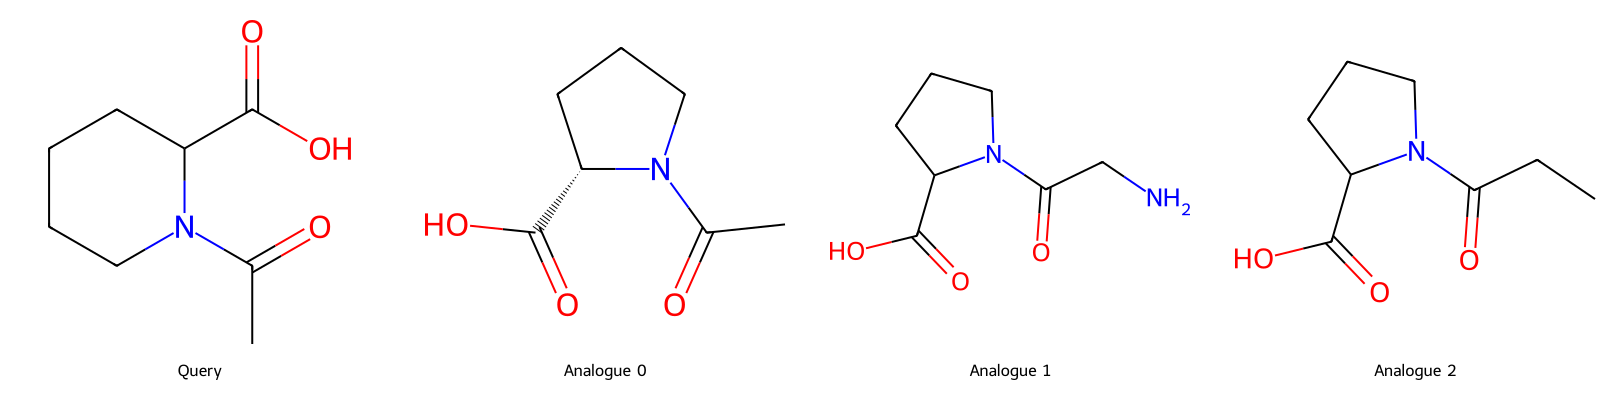

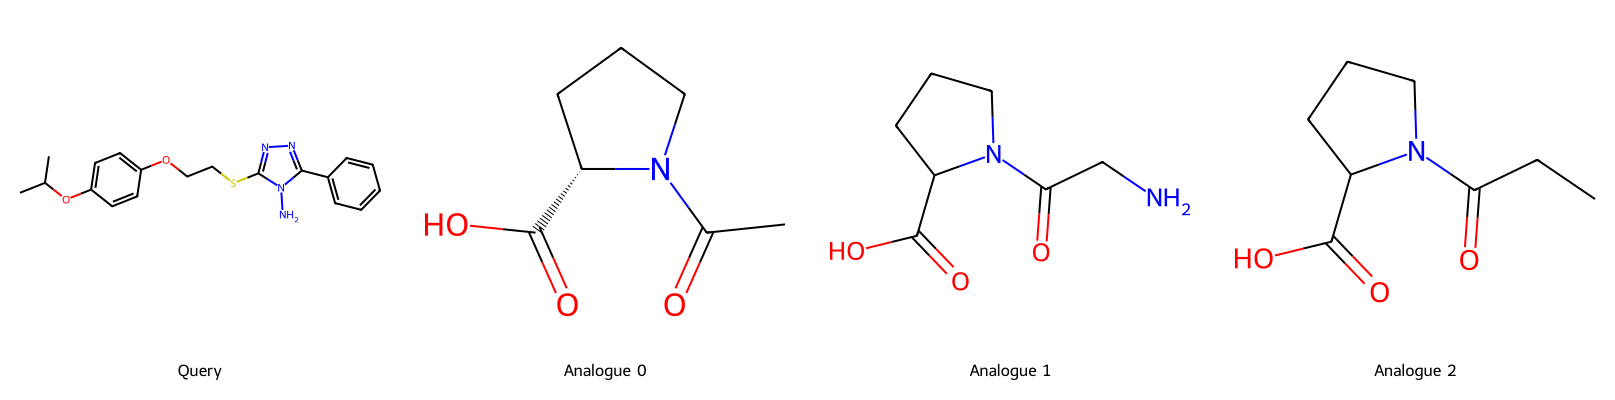

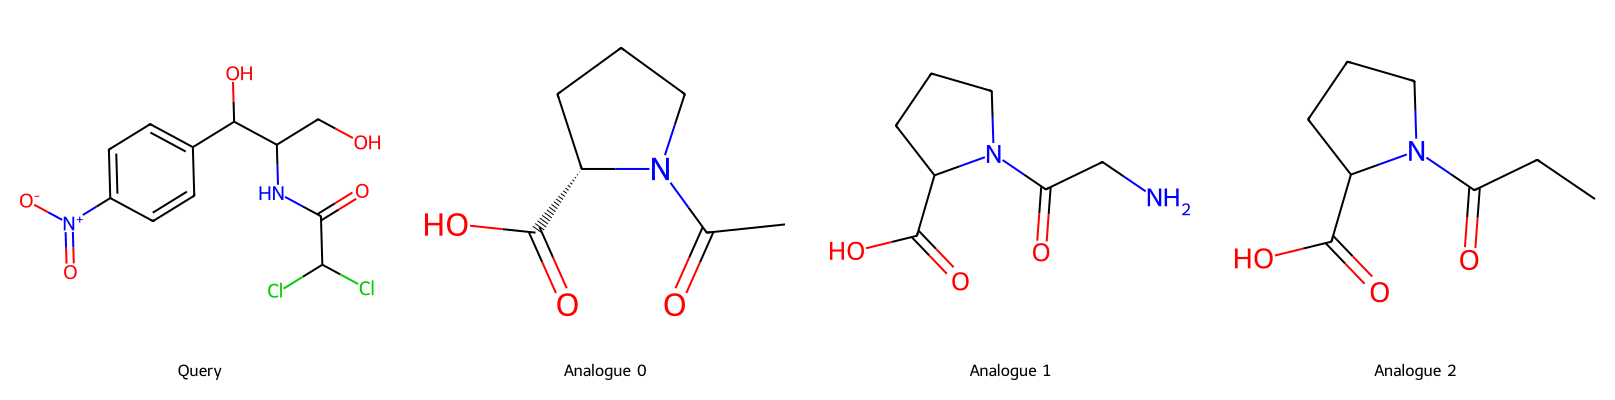

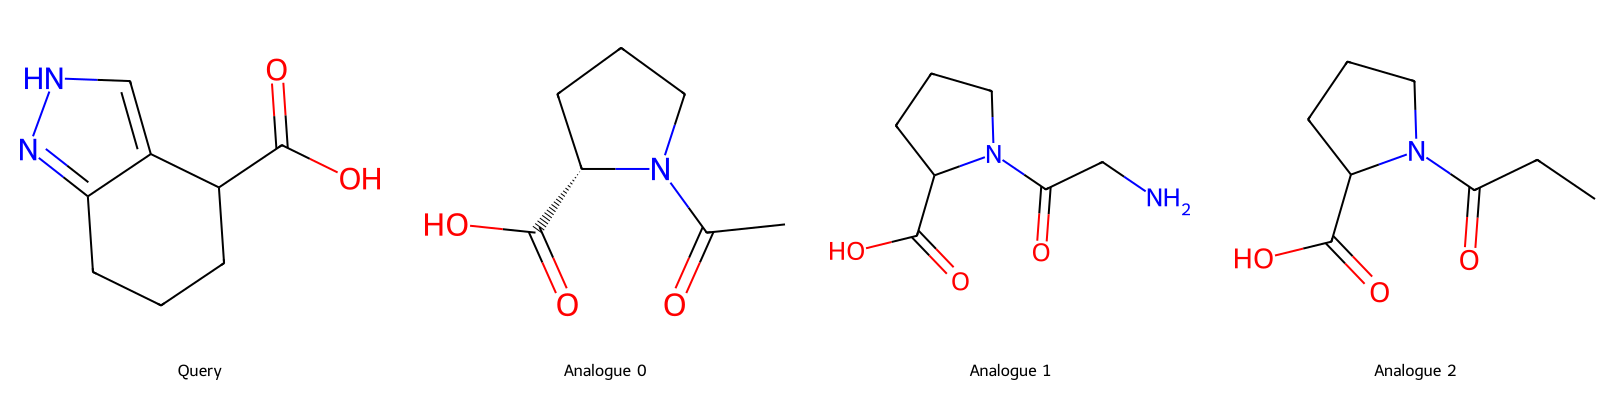

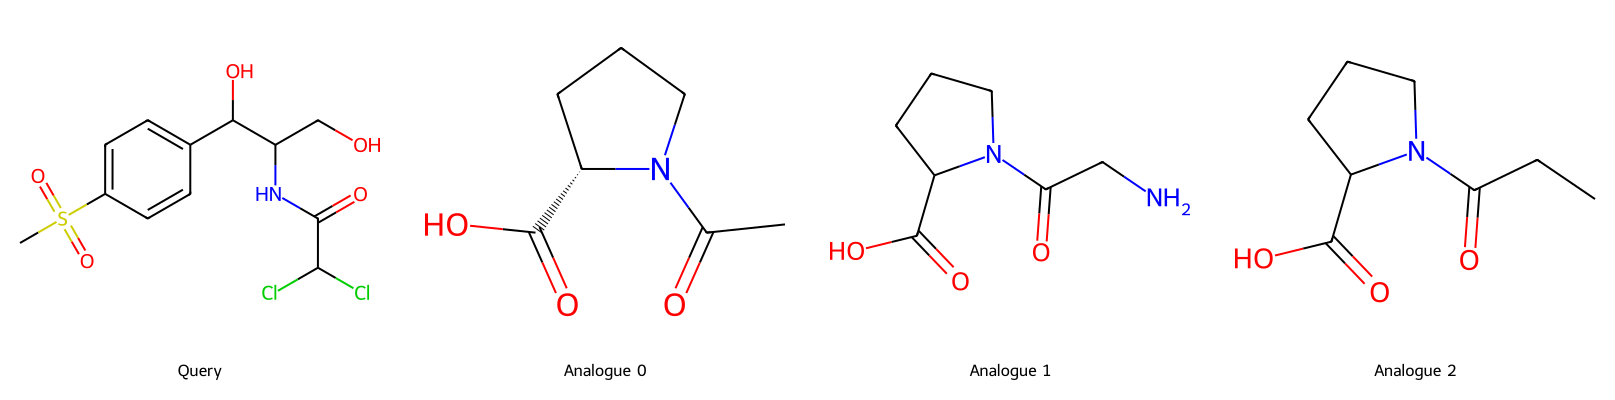

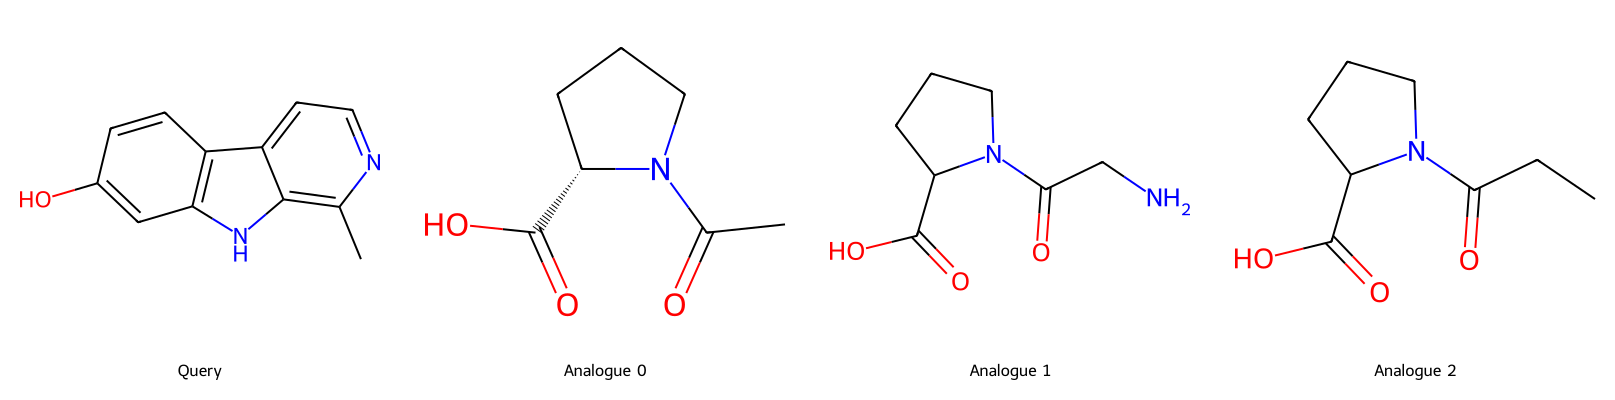

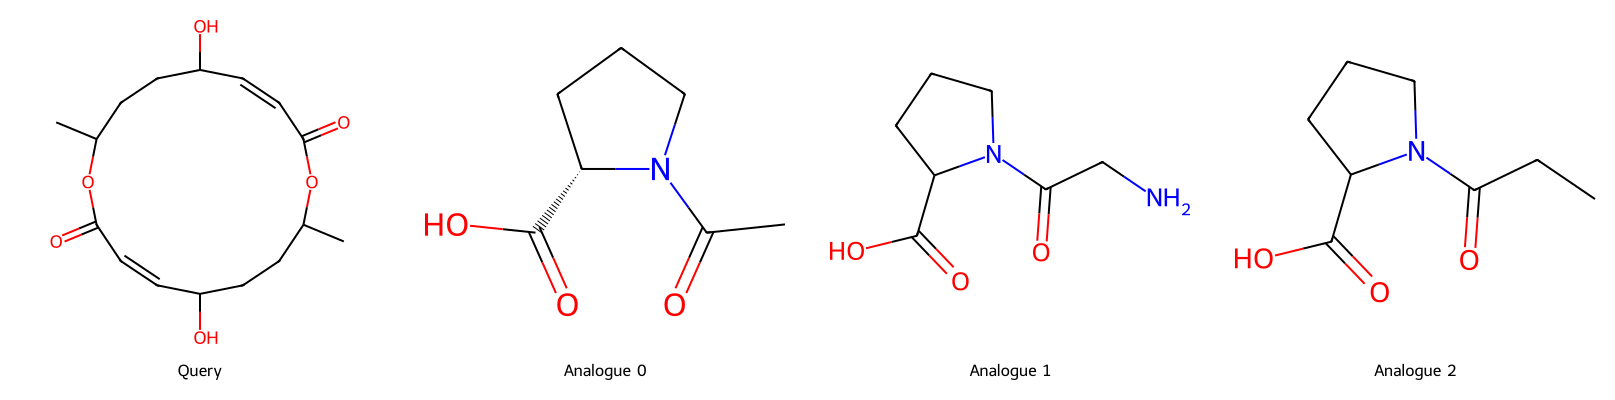

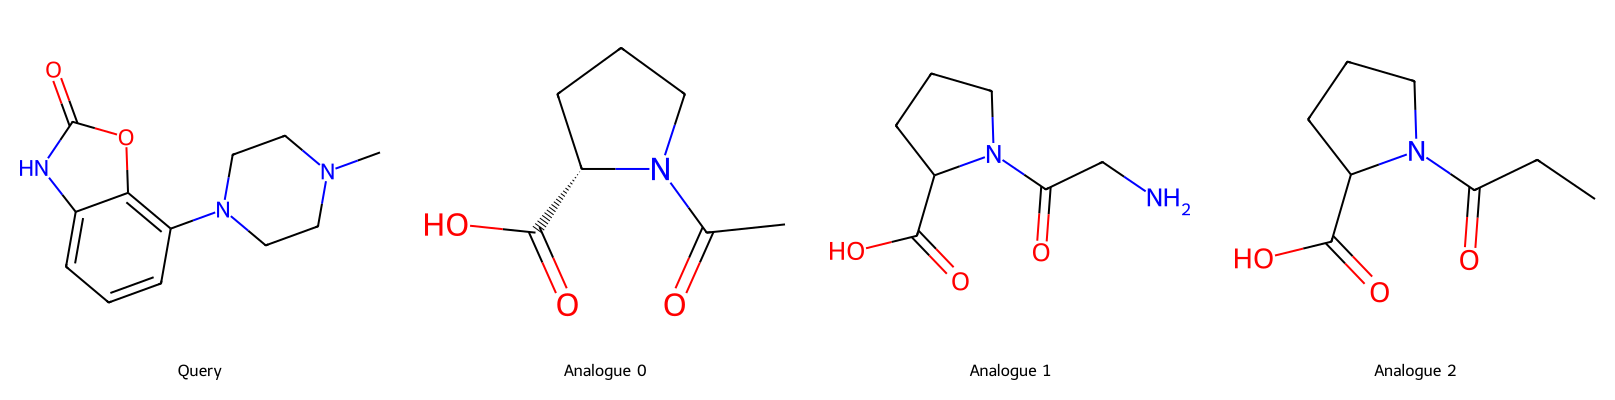

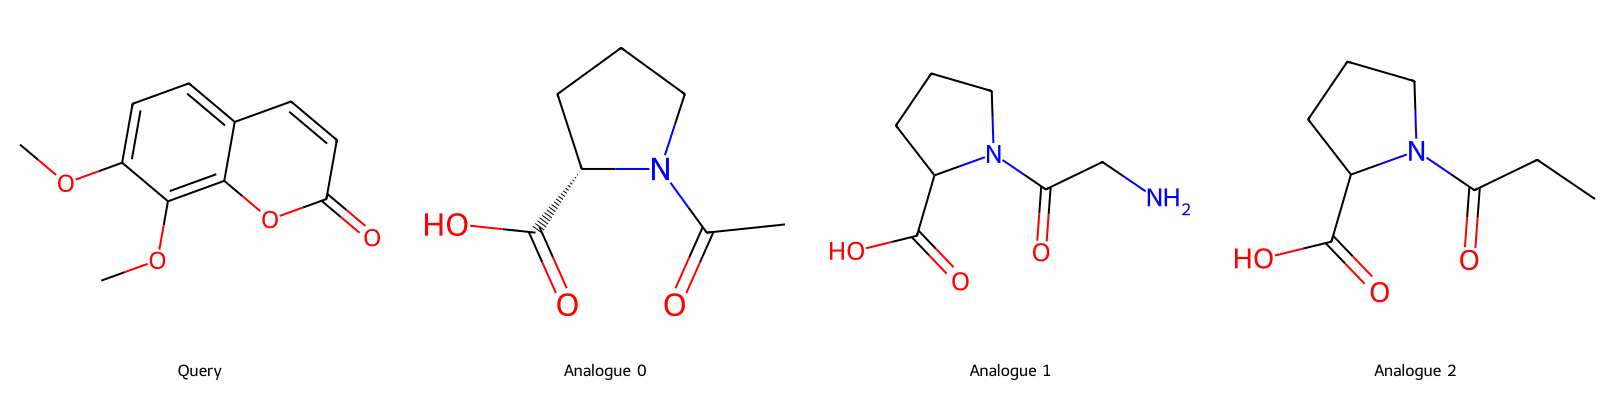

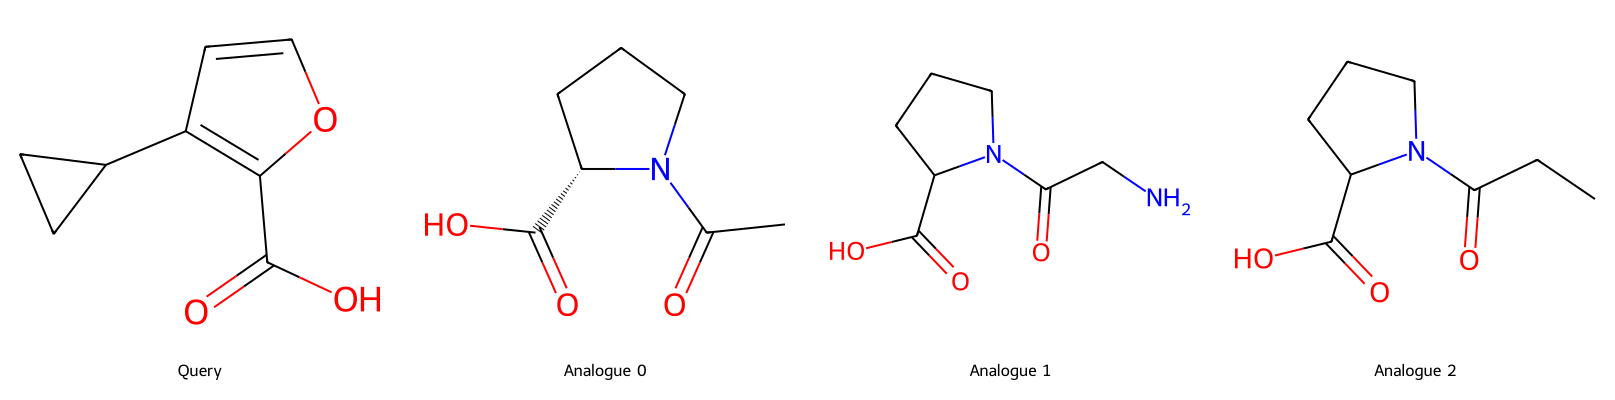

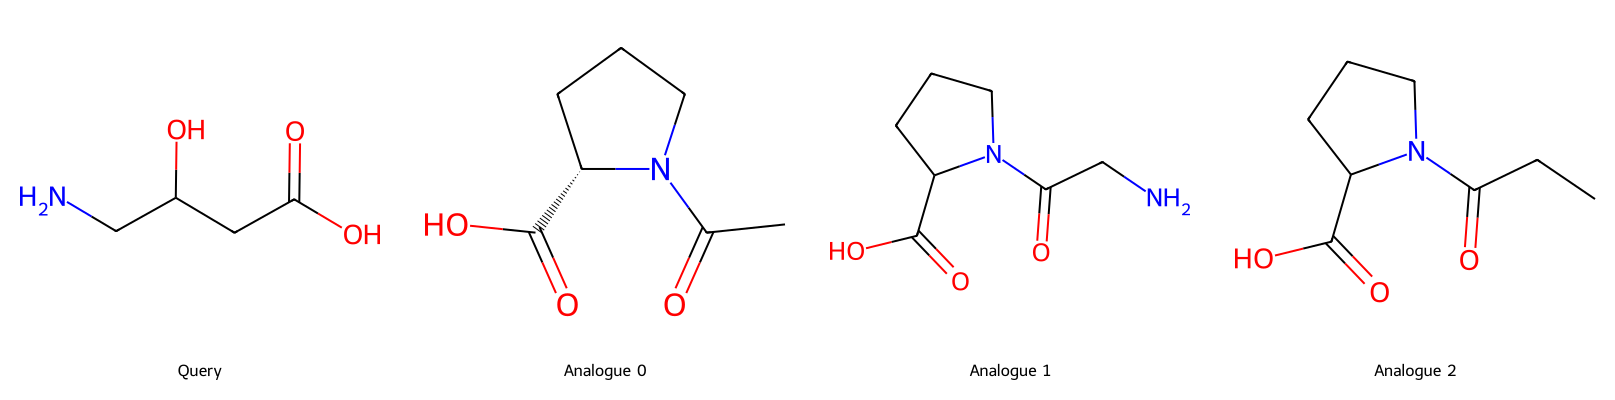

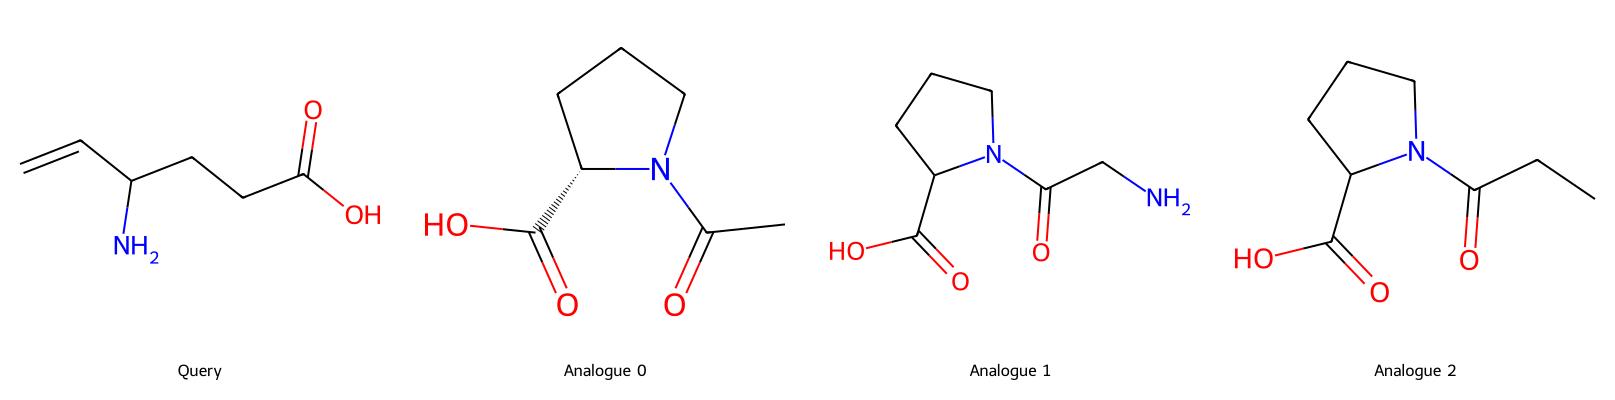

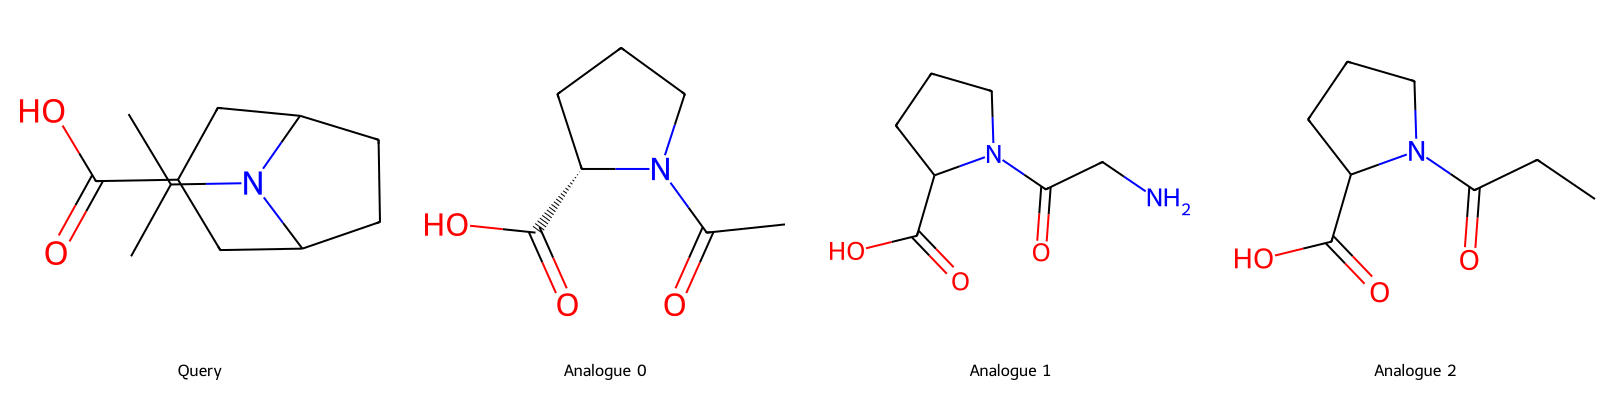

In [151]:
query_ids = [572, 372, 482, 304, 535, 417, 434, 457, 521, 355, 564, 582, 317]

imgs = []
for id in query_ids:
    query_imgs = []
    draw2d = Draw.MolDraw2DCairo(400, 400)
    query_mol = Chem.MolFromSmiles(query_spectra[id].metadata["smiles"])
    query_imgs.append(draw_mol(draw2d, query_mol, legend="Query"))
    
    analogues = generate_mols_from_spectrum_query(
        spectrum_query_result=query_analogues_df
    )
    
    for i, analogue in enumerate(analogues):
        draw2d = Draw.MolDraw2DCairo(400, 400)
        query_imgs.append(draw_mol(draw2d, analogue, legend=f"Analogue {i}"))
    display(draw_images(query_imgs))

#### All analogue sim maps:

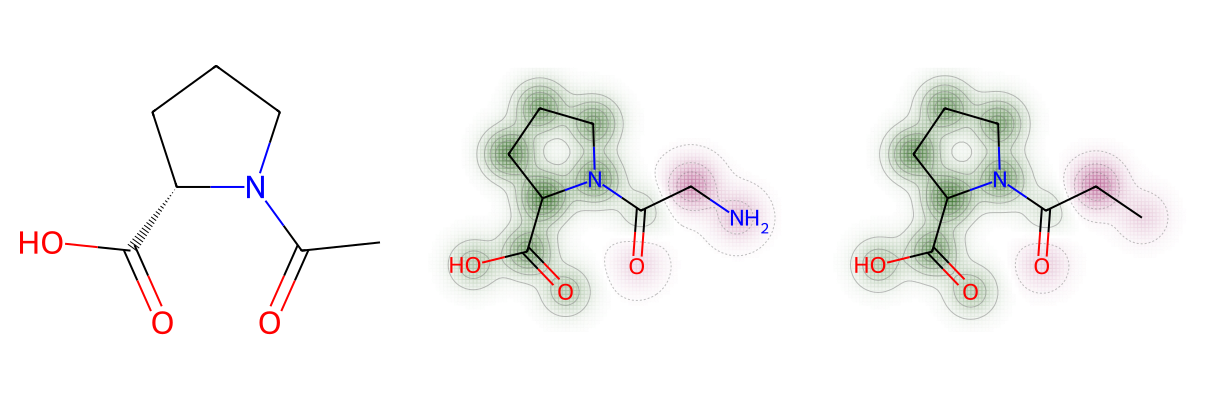

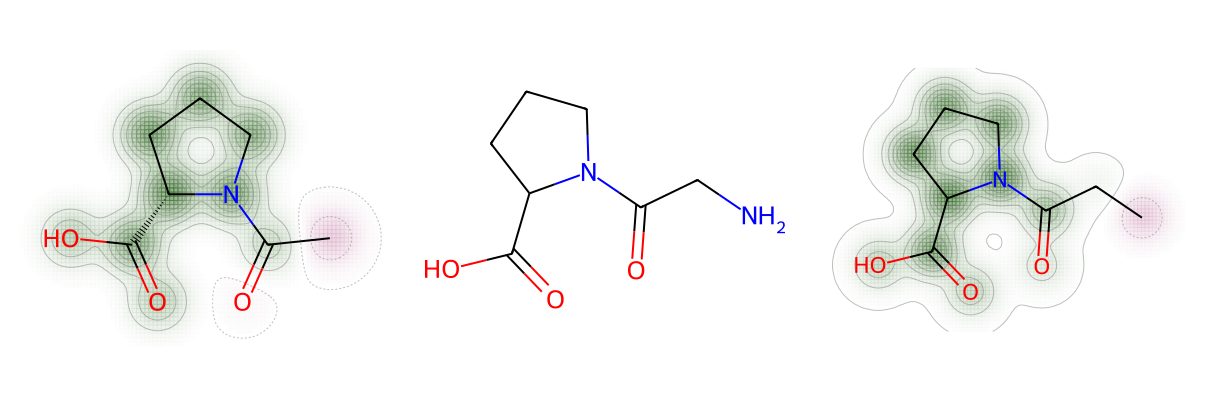

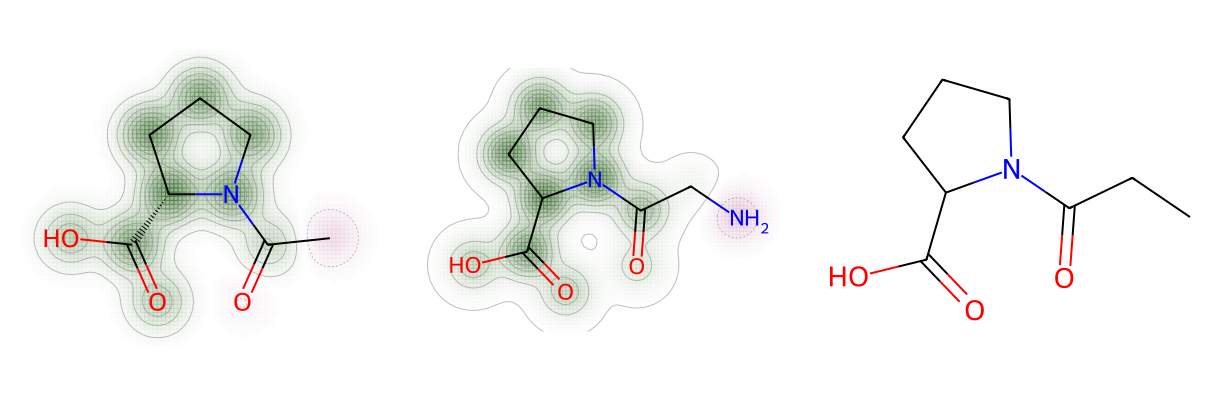

In [152]:
analogue_sim_maps = create_sim_maps(
    query_analogues, fp_function=MorganWrapper, add_legend=False
)

sim_maps_per_mol = len(query_analogues) - 1

assert len(analogue_sim_maps) == sim_maps_per_mol * len(query_analogues)

sim_map_id = 0

for mol_id, mol in enumerate(query_analogues):
    vis_list = []
    draw2d = Draw.MolDraw2DCairo(400, 400)
    for sim_id in range(sim_map_id, sim_map_id + sim_maps_per_mol):
        vis_list.append(analogue_sim_maps[sim_id])
    sim_map_id += sim_maps_per_mol
    vis_list.insert(mol_id, draw_mol(draw2d, mol))
    display(draw_images(vis_list))

#### Frags from stacked sim maps

In [153]:
# select indices of stacked_weights[0] where the value is above 0.2
indices = [
    idx for idx, weight in enumerate(stacked_weights[0]) if weight >= SIM_MAP_THESHOLD
]

fragment_atom_ids = []
if indices:
    consecutive_indices = [indices[0]]
    for i in range(1, len(indices)):
        if indices[i] - indices[i - 1] == 1:
            consecutive_indices.append(indices[i])
        else:
            fragment_atom_ids.append(consecutive_indices)
            consecutive_indices = [indices[i]]

    if consecutive_indices:
        fragment_atom_ids.append(consecutive_indices)

    print(indices)
    print(fragment_atom_ids)
else:
    print("No indices found.")

[1, 3, 4, 5, 6, 7, 8, 9, 10]
[[1], [3, 4, 5, 6, 7, 8, 9, 10]]


In [154]:
from ms_chemical_space_explorer.fragment_extractor import (
    extract_sim_map_fragments_from_mol,
)

from ms_chemical_space_explorer.chemical_space_visualizer import draw_mol

matched_query_higlight_imgs = []
matched_fragments = []
sim_map_fragments = []
unique_smiles = set()
maximum_stacked_substructure = Chem.MolFromSmiles("")
for i, analogue in enumerate(query_analogues):
    fragments = extract_sim_map_fragments_from_mol(
        analogue,
        stacked_weights[i],
        SIM_MAP_THESHOLD,
        fragment_legend=f"{QUERY_SPECTRUM_ID}.{analogue.GetProp('analogue_id')}",
    )
    for fragment in fragments:
        smiles = Chem.MolToSmiles(fragment)
        
        if smiles in unique_smiles:
            continue
        unique_smiles.add(smiles)
        
        sim_map_fragments.append(fragment)
        if fragment.GetNumAtoms() > maximum_stacked_substructure.GetNumAtoms():
            maximum_stacked_substructure = fragment
        substruct_match = query_mol.GetSubstructMatch(fragment)
        
        if len(substruct_match) <= 0:
            continue
        matched_fragments.append(fragment)
        
        d2d = Draw.MolDraw2DCairo(250, 200)
        dopts = d2d.drawOptions()
        dopts.setHighlightColour((0, 0.9, 0.9, 0.8))

        matched_query_higlight_imgs.append(
            draw_mol(
                d2d,
                query_mol,
                legend=f"{fragment.GetProp('fragment_id')}",
                highlight_atoms=substruct_match,
            )
        )

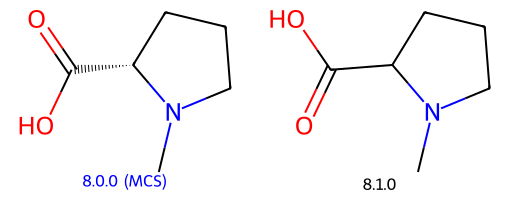

In [155]:
common_substructures = []  # sim_map_fragments.copy()
mcs = Chem.MolFromSmiles("")
for fragment in sim_map_fragments:
    is_common = True
    for analogue in query_analogues:
        if len(analogue.GetSubstructMatch(fragment)) <= 0:
            is_common = False
            break
    if not is_common:
        continue

    common_substructures.append(fragment)
    if fragment.GetNumAtoms() > mcs.GetNumAtoms():
        mcs = fragment

common_substructure_imgs = []
for fragment in common_substructures:
    d2d = Draw.MolDraw2DCairo(250, 200)
    dopts = d2d.drawOptions()

    if fragment == mcs:
        dopts.setLegendColour((0, 0, 1))
        mcs_string = " (MCS)"
    else:
        dopts.setLegendColour((0, 0, 0))
        mcs_string = ""
    common_substructure_imgs.append(
        draw_mol(
            d2d, fragment, legend=f"{fragment.GetProp('fragment_id')}" + mcs_string
        )
    )

draw_images(common_substructure_imgs)

Stacked sim map substructure size = 9


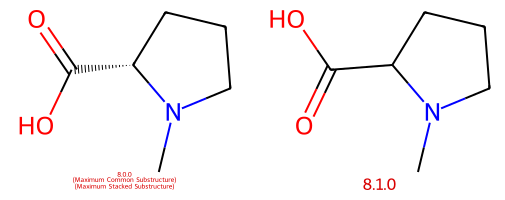

In [156]:
fragment_imgs = []
matched_string = ""
for i, fragment in enumerate(sim_map_fragments):
    d2d = Draw.MolDraw2DCairo(250, 200)
    dopts = d2d.drawOptions()

    if matched_fragments.__contains__(fragment):
        dopts.setLegendColour((0, 0.6, 0))
    else:
        dopts.setLegendColour((0.85, 0, 0))

    if fragment.GetProp("fragment_id") == maximum_stacked_substructure.GetProp(
        "fragment_id"
    ):
        matched_string = "\n(Maximum Stacked Substructure)"
    else:
        matched_string = ""

    if fragment == mcs:
        mcs_string = "\n(Maximum Common Substructure)"
    else:
        mcs_string = ""

    fragment_imgs.append(
        draw_mol(
            d2d,
            fragment,
            legend=f"{fragment.GetProp('fragment_id')}" + mcs_string + matched_string,
        )
    )

print(
    "Stacked sim map substructure size = "
    + str(maximum_stacked_substructure.GetNumAtoms())
)
draw_images(fragment_imgs)

In [157]:
draw_images(matched_query_higlight_imgs)

IndexError: list index out of range

In [ ]:
def find_fragment_in_mol(mol, fragment):
    matches = mol.GetSubstructMatches(fragment)
    return len(matches) > 0


num_matching_fragments = 0
sum_atoms_in_matching_fragments = 0
for fragment in sim_map_fragments:
    if find_fragment_in_mol(query_mol, fragment):
        sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
        num_matching_fragments += 1

num_fragments = len(sim_map_fragments)
query_size = query_mol.GetNumAtoms()
avg_fragment_size = (
    sum_atoms_in_matching_fragments / num_matching_fragments
    if num_matching_fragments > 0
    else 0
)
fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

print(
    f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%"
)
print(
    f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}"
)
print(f"Score: {fragment_score:.2f}")

Found 4/8 analogue fragments in the query molecule: 50.00%
Average fragment size: 1.50 atoms. Query size: 14 atoms: 0.11
Score: 0.05


#### Frags from all sim maps

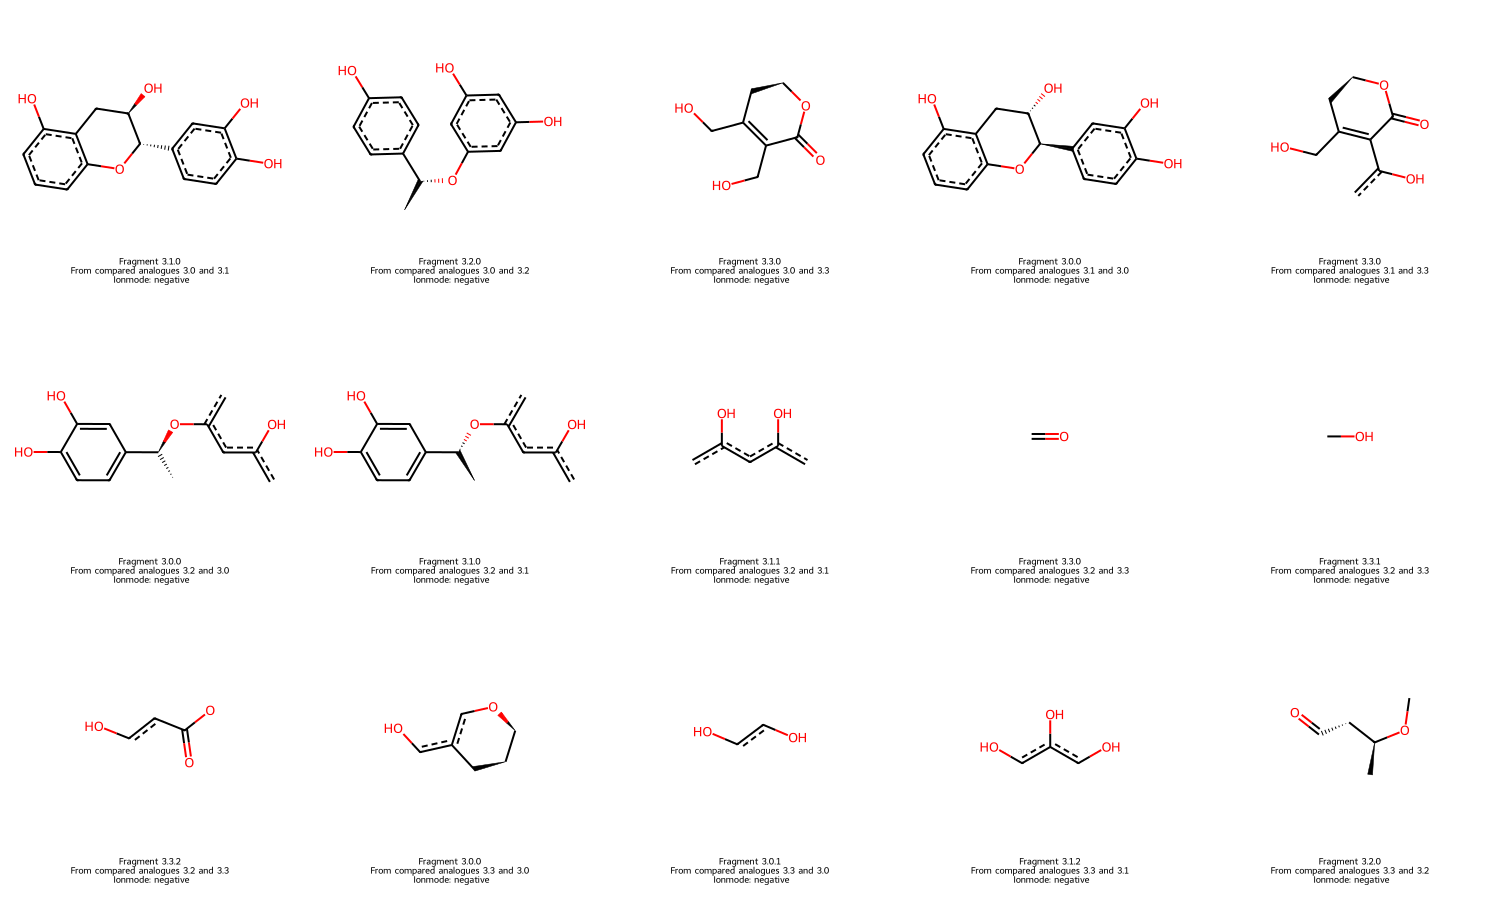

In [ ]:
from ms_chemical_space_explorer.fragment_extractor import (
    extract_sim_map_fragments_from_analogues,
)


from ms_chemical_space_explorer.chemical_space_visualizer import (
    visualize_similarity_fragments,
)



fragments = extract_sim_map_fragments_from_analogues(
    query_analogues, SIM_MAP_THESHOLD, MorganWrapper
)


# remove duplicate fragments by comparing smiles


unique_smiles = set()


unique_fragments = []


for fragment in fragments:


    smiles = Chem.MolToSmiles(fragment)


    if smiles not in unique_smiles:


        unique_smiles.add(smiles)


        unique_fragments.append(fragment)


visualize_similarity_fragments(unique_fragments, FRAGMENTS_PER_ROW)

In [ ]:
def find_fragment_in_mol(mol, fragment):
    matches = mol.GetSubstructMatches(fragment)
    return len(matches) > 0


num_matching_fragments = 0
sum_atoms_in_matching_fragments = 0
for fragment in unique_fragments:
    if find_fragment_in_mol(query_mol, fragment):
        sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
        num_matching_fragments += 1

num_fragments = len(unique_fragments)
query_size = query_mol.GetNumAtoms()
avg_fragment_size = (
    sum_atoms_in_matching_fragments / num_matching_fragments
    if num_matching_fragments > 0
    else 0
)
fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

print(
    f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%"
)
print(
    f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}"
)
print(f"Score: {fragment_score:.2f}")

Found 2/15 analogue fragments in the query molecule: 13.33%
Average fragment size: 2.00 atoms. Query size: 14 atoms: 0.14
Score: 0.02


#### What should my SimMap Fragment algorithm acuatually find???

I want to find fragments in the analogues, that are also present in the query spectrum. A stupid way to that, would be just to find all the single C atoms, because there are lots in the analogues and the query atom. I can punish this, by removing all duplicate fragments. This way,
- **the more unique fragments are found, the better!**. 

There is a drawback to removing the duplicates though. If a fragment is occuring multiple times in a single analogue, and just as many times in the query, that might be a clue for similarity. The removing could be countered by counting the occurances and rewarding a similiar count, but that would also bring back the problem with single C atoms: 
- **Multiple fragment occurances in the query mol are disregarded** 
to keep this project from exploding.

As I am not interested in single C atoms, I might also state, that I want to find large fragments. Large could mean a high number of atoms, or a high number of mass. I am unsure what would be better so I am going for the easier solution to reward fragments with a lot of atoms: 
- **The more atoms in a single fragment, the better!** and **Mass of fragments is disregarded!**

After all, the fragments should be contained in the query mol. So this is actually the most important to the score: 
- **Fragments that are no substructure of the query spectrum, are punished!**. 

This could be a good counter balance to the general reward of large atoms and just finding a lot of fragments.


The quality of the fragments found will be scored like this:
```
n = number of fragments occuring in the query
m = average of number of atoms in a fragment
o = number of fragments NOT occuring in the query

s = (n - o) * m
```

To normalize the score, fragment size will be divided through the number of atoms in the query molecule. Fragments that are larger than the query molecule would achieve average fragment size > 1. So only the fragments contained in the substructure will contribute to the average fragment size multiplier. 

```
num_fragments = total number of fragments, that were extracted from the analogues
num_matching_fragments = number of fragments occurring in the query
query_size = number of atoms in the query molecule
avg_fragment_size = average number of atoms in matching fragments
fragment_score = avgFragmentSize / query size * num_matching_fragments / num_fragments
```


In [ ]:
from ms_chemical_space_explorer.fragment_extractor import (
    extract_sim_map_fragments_from_analogues,
)


from ms_chemical_space_explorer.chemical_space_visualizer import (
    visualize_similarity_fragments,
)



def calculate_fragment_score(query_mol, fragments, debug=False):


    unique_smiles = set()


    unique_fragments = []


    for fragment in fragments:


        smiles = Chem.MolToSmiles(fragment)


        if smiles not in unique_smiles:


            unique_smiles.add(smiles)


            unique_fragments.append(fragment)


    num_matching_fragments = 0


    sum_atoms_in_matching_fragments = 0


    for fragment in unique_fragments:


        if len(query_mol.GetSubstructMatches(fragment)) > 0:


            sum_atoms_in_matching_fragments += fragment.GetNumAtoms()


            num_matching_fragments += 1


    num_fragments = len(unique_fragments)


    query_size = query_mol.GetNumAtoms()


    avg_fragment_size = (
        sum_atoms_in_matching_fragments / num_matching_fragments
        if num_matching_fragments > 0
        else 0
    )
    fragment_score = (
        avg_fragment_size / query_size * num_matching_fragments / num_fragments
    )

    if debug:


        print(
            f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%"
        )


        print(
            f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}"
        )


        print(f"Score: {fragment_score:.3f}")
    return fragment_score

In [ ]:
from ms_chemical_space_explorer.fragment_extractor import (
    generate_mols_from_spectrum_query,
)



query_mol = Chem.MolFromSmiles(query_spectra[QUERY_SPECTRUM_ID].metadata["smiles"])


query_analogues_df = all_analogues[
    all_analogues["query_spectrum_id"] == QUERY_SPECTRUM_ID
]


query_analogues = generate_mols_from_spectrum_query(
    spectrum_query_result=query_analogues_df
)



fragments = extract_sim_map_fragments_from_analogues(
    query_analogues,
    0.9,
    MorganWrapper,
)


calculate_fragment_score(query_mol, fragments, debug=True)

Found 7/7 analogue fragments in the query molecule: 100.00%
Average fragment size: 1.71 atoms. Query size: 21 atoms: 0.08
Score: 0.082


0.08163265306122448

## FMCS

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

FMCS size = 10


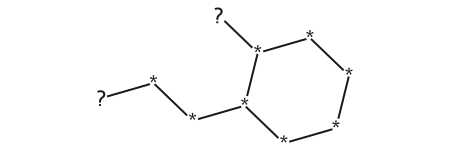

In [ ]:
params = rdFMCS.MCSParameters()
params.AtomTyper = rdFMCS.AtomCompare.CompareElements
params.BondTyper = rdFMCS.BondCompare.CompareOrderExact
params.AtomCompareParameters.RingMatchesRingOnly = True
params.Timeout = 120

mcs = rdFMCS.FindMCS(query_analogues, params)
print("FMCS size = " + str(mcs.queryMol.GetNumAtoms()))
mcs.queryMol

In [ ]:
mcs.canceled

False

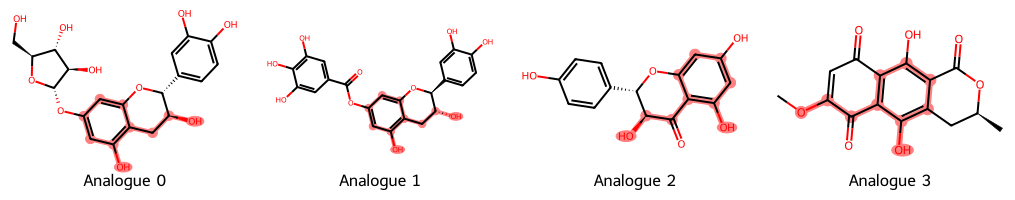

In [ ]:
matched_query_higlight_imgs = []
for i, mol in enumerate(query_analogues):
    d2d = Draw.MolDraw2DCairo(250, 200)
    matched_query_higlight_imgs.append(
        draw_mol(
            d2d,
            mol,
            legend=f"Analogue {i}",
            highlight_atoms=mol.GetSubstructMatch(mcs.queryMol),
        )
    )

draw_images(matched_query_higlight_imgs)

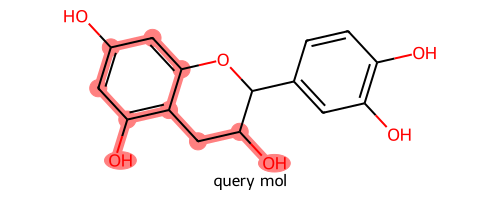

In [ ]:
d2d = Draw.MolDraw2DCairo(500, 200)
draw_mol(
    d2d,
    query_mol,
    legend="query mol",
    highlight_atoms=query_mol.GetSubstructMatch(mcs.queryMol),
)

In [ ]:
query_mol.GetSubstructMatch(mcs.queryMol)

(2, 3, 1, 4, 10, 0, 5, 6, 9, 7)

In [ ]:
query_mol.GetSubstructMatches(mcs.queryMol)

((2, 3, 1, 4, 10, 0, 5, 6, 9, 7),)

In [ ]:
from PIL import Image
from io import BytesIO


def str_to_image(byte_data: str) -> Image.Image:
    bio = BytesIO(byte_data)
    return Image.open(bio)


# taken from https://projects.volkamerlab.org/teachopencadd/talktorials/T006_compound_maximum_common_substructures.html
from copy import deepcopy
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


def highlight_molecules(
    molecules, mcs, number, label=True, same_orientation=True, **kwargs
):
    """Highlight the MCS in our query molecules"""
    molecules = deepcopy(molecules)
    # convert MCS to molecule
    pattern = Chem.MolFromSmarts(mcs.smartsString)
    # find the matching atoms in each molecule
    matching = [molecule.GetSubstructMatch(pattern) for molecule in molecules[:number]]

    legends = None
    if label is True:
        legends = [x.GetProp("_Name") for x in molecules]

    # Align by matched substructure so they are depicted in the same orientation
    # Adapted from: https://gist.github.com/greglandrum/82d9a86acb3b00d3bb1df502779a5810
    if same_orientation:
        mol, match = molecules[0], matching[0]
        AllChem.Compute2DCoords(mol)
        coords = [mol.GetConformer().GetAtomPosition(x) for x in match]
        coords2D = [Geometry.Point2D(pt.x, pt.y) for pt in coords]
        for mol, match in zip(molecules[1:number], matching[1:number]):
            if not match:
                continue
            coord_dict = {match[i]: coord for i, coord in enumerate(coords2D)}
            AllChem.Compute2DCoords(mol, coordMap=coord_dict)

    return Draw.MolsToGridImage(
        molecules[:number],
        legends=legends,
        molsPerRow=5,
        highlightAtomLists=matching[:number],
        subImgSize=(200, 200),
        **kwargs,
    )

## BitVector Fragments

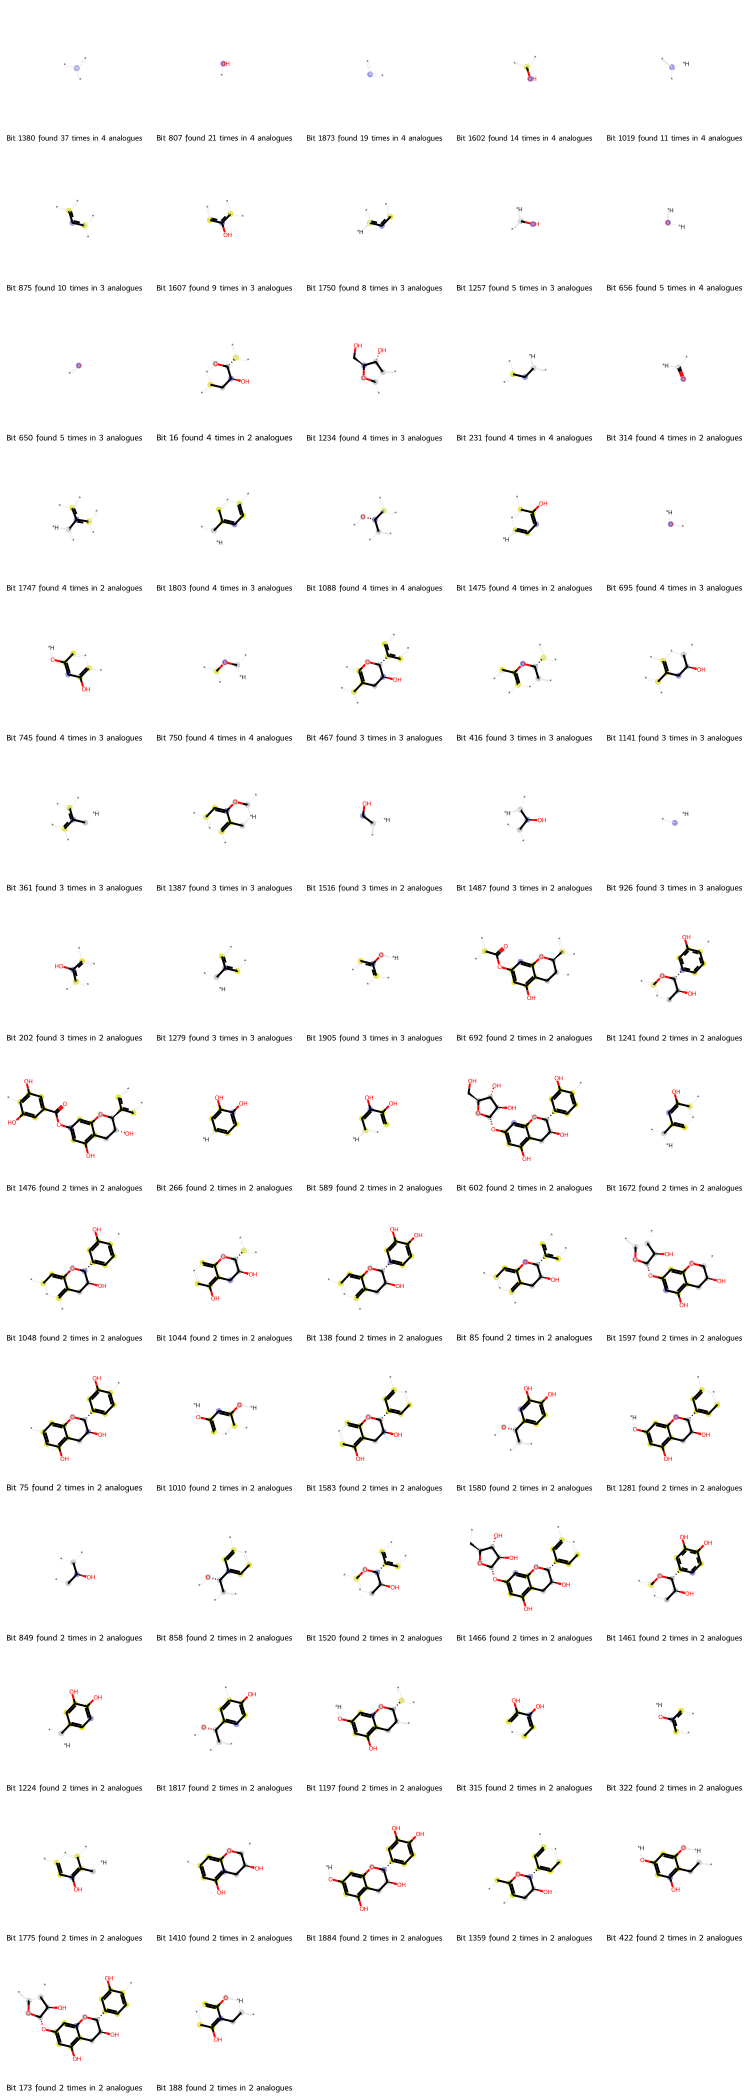

In [ ]:
from ms_chemical_space_explorer.fragment_extractor import (
    extract_bitvector_fragments_from_analogues,
)



extract_bitvector_fragments_from_analogues(
    query_analogues,
    MORGAN_RADIUS,
    fragments_per_row=FRAGMENTS_PER_ROW,
    count_threshold=0,
)

## Spectra Plotting

#### old

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def parse_mgf_spectrum(file_path, spectrum_index=0):
    """Parse a single spectrum from an MGF file.

    Args:
        file_path (str): Path to the MGF file
        spectrum_index (int): Index of the spectrum to parse (0-based)

    Returns:
        tuple: (metadata dict, m/z array, intensity array)
    """
    with open(file_path, "r") as f:
        mgf_text = f.read()

    spectra = mgf_text.split("BEGIN IONS")
    if spectrum_index + 1 >= len(spectra):
        raise ValueError(
            f"Spectrum index {spectrum_index} not found. File contains {len(spectra)-1} spectra."
        )

    spectrum_text = spectra[spectrum_index + 1].split("END IONS")[0]

    # Extract metadata and peaks
    metadata = {}
    peaks_mz = []
    peaks_intensity = []

    for line in spectrum_text.split("\n"):
        line = line.strip()
        if not line:
            continue

        if "=" in line:
            key, value = line.split("=", 1)
            metadata[key] = value
        elif line[0].isdigit():
            try:
                mz, intensity = map(float, line.split())
                peaks_mz.append(mz)
                peaks_intensity.append(intensity)
            except ValueError:
                continue  # Skip lines that can't be parsed as peaks

    return metadata, np.array(peaks_mz), np.array(peaks_intensity)


def plot_spectrum(mz, intensity, metadata, title=None):
    """Create a mass spectrum plot.

    Args:
        mz (array): m/z values
        intensity (array): intensity values
        metadata (dict): spectrum metadata
        title (str, optional): custom title for the plot
    """
    plt.figure(figsize=(12, 6))

    # Create stem plot for the spectrum
    markerline, stemlines, baseline = plt.stem(mz, intensity, use_line_collection=True)
    plt.setp(markerline, "markerfacecolor", "navy")
    plt.setp(stemlines, "color", "navy")
    plt.setp(baseline, "color", "gray")

    # Set labels and title
    plt.xlabel("m/z")
    plt.ylabel("Relative Intensity")
    if title:
        plt.title(title)
    else:
        compound_name = metadata.get("COMPOUND_NAME", "Unknown Compound")
        precursor_mz = metadata.get("PRECURSOR_MZ", "N/A")
        formula = metadata.get("FORMULA", "")
        title_text = f"{compound_name}\nPrecursor m/z: {precursor_mz}"
        if formula:
            title_text += f"\nFormula: {formula}"
        plt.title(title_text)

    # Add grid
    plt.grid(True, alpha=0.3)

    # Adjust layout
    plt.tight_layout()

    return plt.gcf()

C:\Users\kevin\AppData\Local\Temp\ipykernel_480\1110123354.py:62: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(mz, intensity, use_line_collection=True)


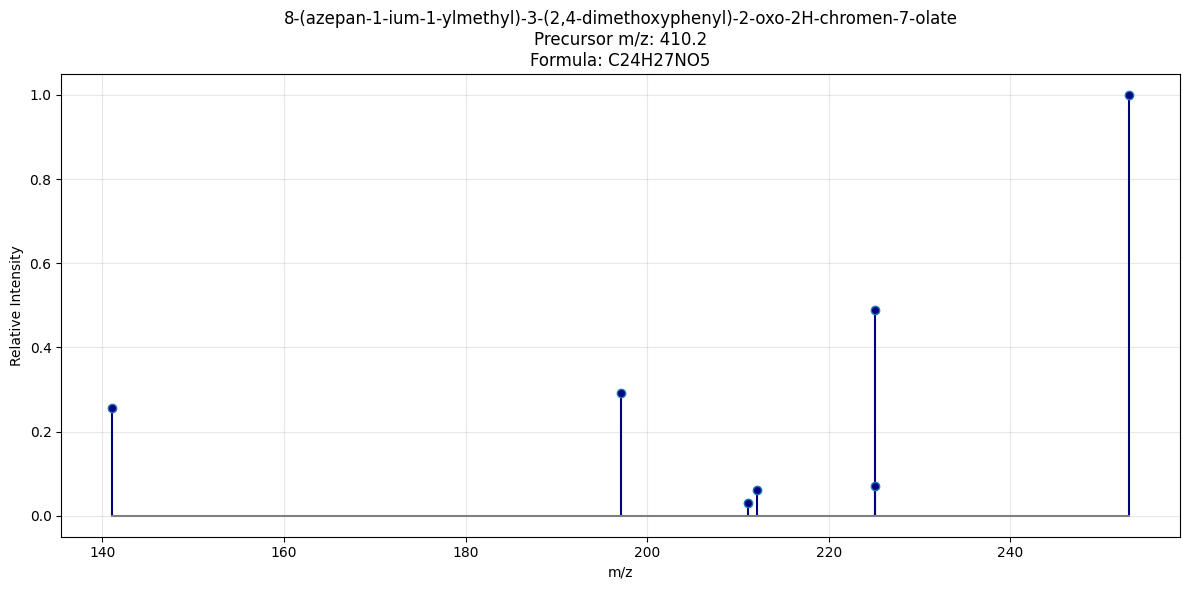


Spectrum Metadata:
Compound: 8-(azepan-1-ium-1-ylmethyl)-3-(2,4-dimethoxyphenyl)-2-oxo-2H-chromen-7-olate
Formula: C24H27NO5
Precursor m/z: 410.2
Adduct: [M+H]+


In [ ]:
spectrum_index = 600

# Parse and plot spectrum
metadata, mz, intensity = parse_mgf_spectrum(FILENAME, spectrum_index=spectrum_index)
plot_spectrum(mz, intensity, metadata)
plt.show()

# Print some metadata
print("\nSpectrum Metadata:")
print(f"Compound: {metadata.get('COMPOUND_NAME', 'Unknown')}")
print(f"Formula: {metadata.get('FORMULA', 'Not specified')}")
print(f"Precursor m/z: {metadata.get('PRECURSOR_MZ', 'Not specified')}")
print(f"Adduct: {metadata.get('ADDUCT', 'Not specified')}")

#### matchMS

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matchms.plotting.spectrum_plots import plot_spectra_mirror
from matplotlib.lines import Line2D


def plot_spectra_multi_mirror(reference, spectra, figsize=(10, 7), cmap="tab10"):
    """
    Plot a reference spectrum against multiple comparison spectra with transparent background.

    Parameters:
    -----------
    reference : matchms.Spectrum
        The reference spectrum to compare against
    spectra : list of matchms.Spectrum
        List of spectra to compare with the reference
    figsize : tuple, default=(10, 7)
        Figure size
    cmap : str, default='tab10'
        Matplotlib colormap to use for the spectra colors

    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """

    # Create a single figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)

    # Get colormap and generate colors for all spectra (reference + comparison)
    colormap = cm.get_cmap(cmap)
    all_colors = [colormap(i / (len(spectra))) for i in range(len(spectra) + 1)]

    # First color for reference, rest for comparison spectra
    ref_color = all_colors[0]
    comp_colors = all_colors[1:]

    # Calculate alpha values - decreasing for each additional spectrum
    alphas = [1.0 - (i * (0.6 / max(1, len(spectra) - 1))) for i in range(len(spectra))]

    # Plot each comparison
    for i, (spectrum, color, alpha) in enumerate(zip(spectra, comp_colors, alphas)):
        plot_spectra_mirror(
            reference,
            spectrum,
            ax=ax,
            color_top=ref_color,
            color_bottom=color,
            **{"alpha": alpha},
        )

    # Make text backgrounds transparent
    for text in ax.texts:
        text.set_backgroundcolor("none")

    # Create custom legend with correct spectrum labels
    legend_elements = [
        Line2D(
            [0],
            [0],
            color=ref_color,
            lw=2,
            label=reference.metadata.get("compound_name", f"Reference"),
        )
    ]

    for i, (spectrum, color, alpha) in enumerate(zip(spectra, comp_colors, alphas)):
        name = spectrum.metadata.get("compound_name", f"Spectrum {i+1}")
        legend_elements.append(
            Line2D([0], [0], color=color, lw=2, alpha=alpha, label=name)
        )

    ax.legend(handles=legend_elements, loc="upper right")

    return fig, ax

C:\Users\kevin\AppData\Local\Temp\ipykernel_480\511587186.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


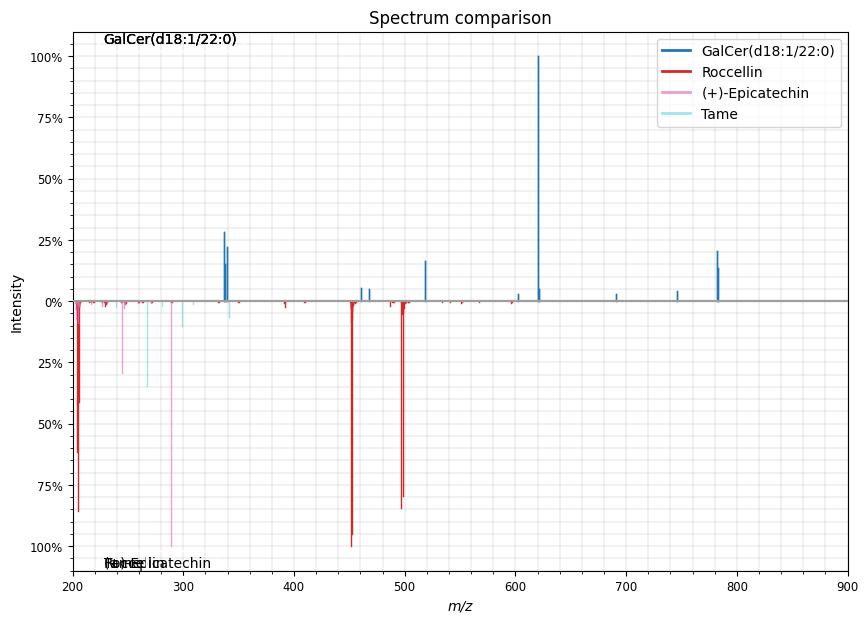

In [ ]:
spectra = [query_spectra[2], query_spectra[3], query_spectra[5]]
fig, ax = plot_spectra_multi_mirror(query_spectra[0], spectra)

# # Save the figure
# plt.savefig('combined_spectra.png', transparent=True, dpi=300)

In [ ]:
import matplotlib.pyplot as plt



def set_transparent(fig, ax):


    # Set transparent background for both figure and axes


    fig.patch.set_alpha(0.0)  # Make figure background transparent


    ax.patch.set_alpha(0.0)  # Make axes background transparent


    # Make text label backgrounds transparent


    for text in ax.texts:


        text.set_backgroundcolor("none")

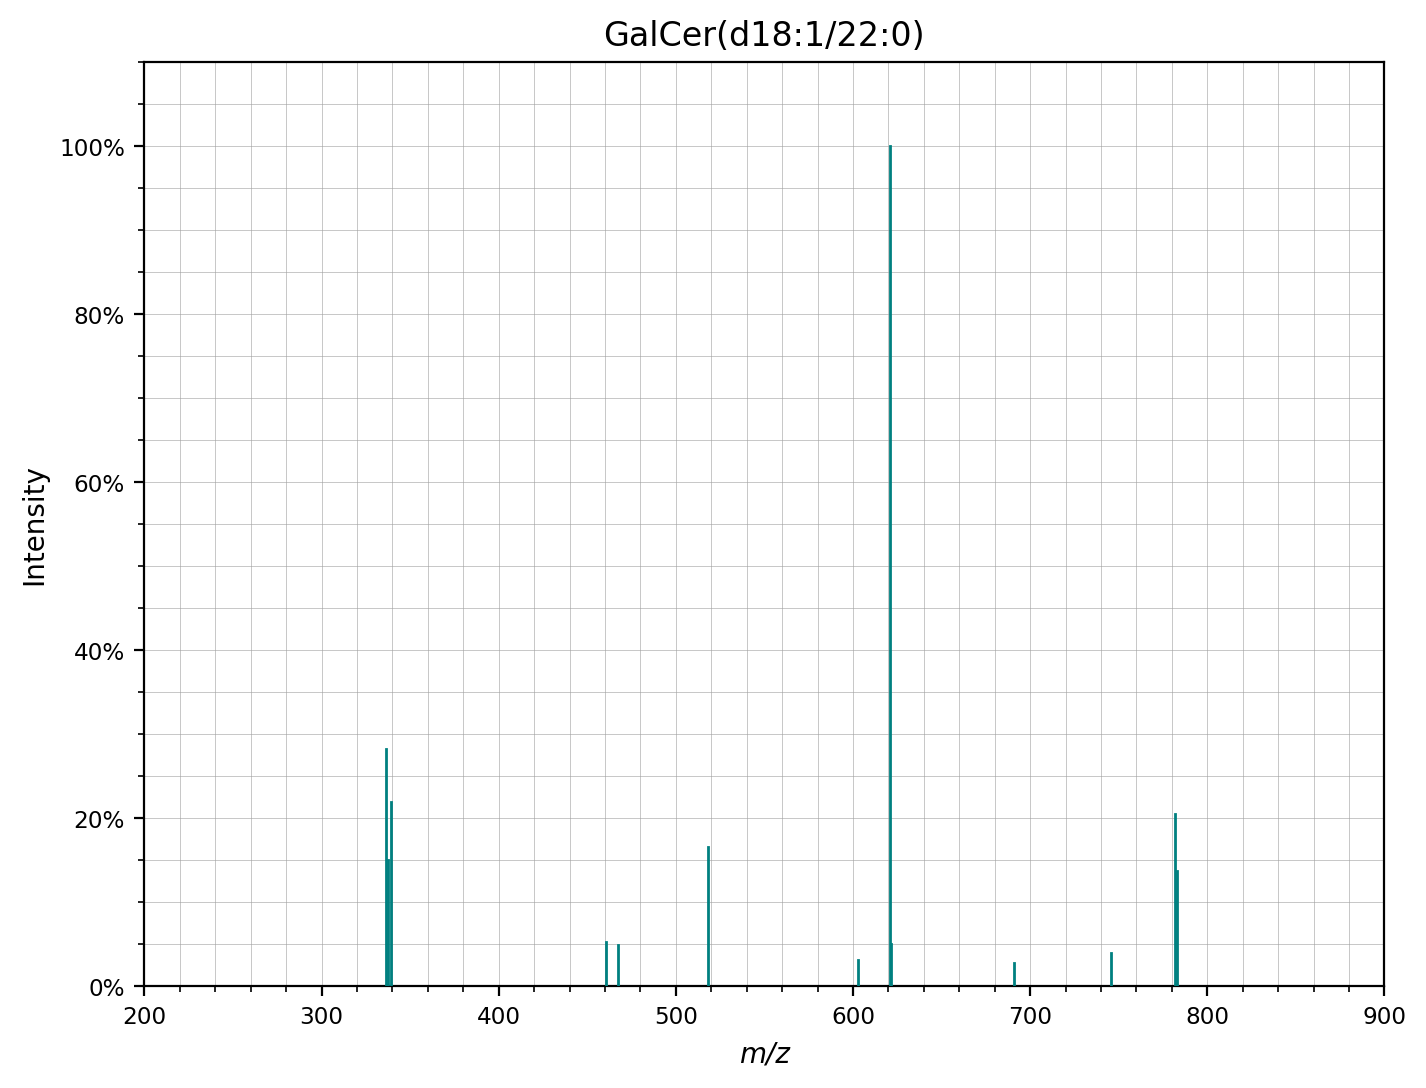

In [ ]:
fig, ax = query_spectra[0].plot()
set_transparent(fig, ax)
plt.show()

#### SpectraUtils

matchMS useds spectraUtils code. Might as well use the [original](https://spectrum-utils.readthedocs.io/en/latest/plotting.html) with all the extra functionality including interactive plots.